In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split

In [2]:
# Part B

positions = [[0,0]]

posx = 0
posy = 0

for i in range(20):
    curr = random.uniform(0, 1)
    if curr <= 0.25:
        posx = posx + 1
        posy = posy + 1
    elif curr <= 0.5:
        posx = posx - 0.25
    elif curr <= 0.75:
        posy = posy - 0.25
    else:
        posx = posx + 0.5
        posy = posy + 0.5
    positions.append([posx,posy])

print("Positions of the robot are given as")
for i in range(20):
    print("i:",positions[i][0],"j:",positions[i][1])
    
print()
print("Final position is",positions[-1])

Positions of the robot are given as
i: 0 j: 0
i: -0.25 j: 0
i: -0.5 j: 0
i: 0.0 j: 0.5
i: 1.0 j: 1.5
i: 1.5 j: 2.0
i: 2.0 j: 2.5
i: 1.75 j: 2.5
i: 1.5 j: 2.5
i: 1.5 j: 2.25
i: 2.5 j: 3.25
i: 2.5 j: 3.0
i: 2.5 j: 2.75
i: 2.25 j: 2.75
i: 3.25 j: 3.75
i: 3.0 j: 3.75
i: 3.0 j: 3.5
i: 3.5 j: 4.0
i: 3.25 j: 4.0
i: 3.25 j: 3.75

Final position is [3.75, 4.25]


In [3]:
# Part C

iterations = []
for _ in range(200):
    
    positions = [[0,0]]
    posx = 0
    posy = 0

    for i in range(20):
        curr = random.uniform(0, 1)
        if curr <= 0.25:
            posx = posx + 1
            posy = posy + 1
        elif curr <= 0.5:
            posx = posx - 0.25
        elif curr <= 0.75:
            posy = posy - 0.25
        else:
            posx = posx + 0.5
            posy = posy + 0.5
        positions.append([posx,posy])
    
    iterations.append(positions)

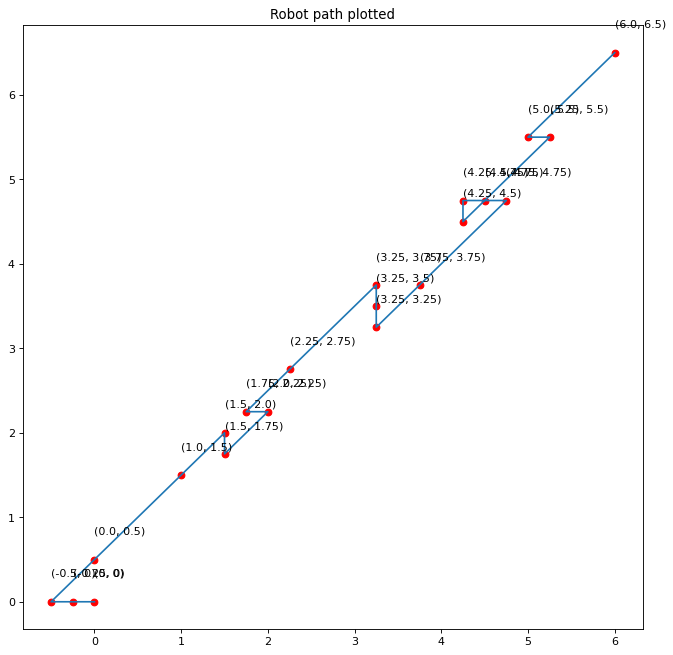

In [4]:
# Part D
# Plotting one of the iterations, since none of the iterations seem to have won

myIter = iterations[random.randint(1,200)]

x = []
y = []

for i in myIter:
    x.append(i[0])
    y.append(i[1])
    
figure(figsize=(10, 10), dpi=80)
plt.plot(x,y)
plt.scatter(x,y, c = "r")
plt.title("Robot path plotted")

for i, j in zip(x, y):
   plt.text(i, j+0.3, '({}, {})'.format(i, j))

In [5]:
# Part e

# Making a dataset with 4 moves and 5 position

iterations = []
for _ in range(200):
    
    positions = []
    posx = 0
    posy = 0

    for i in range(5):
        curr = random.uniform(0, 1)
        if curr <= 0.25:
            posx = posx + 1
            posy = posy + 1
        elif curr <= 0.5:
            posx = posx - 0.25
        elif curr <= 0.75:
            posy = posy - 0.25
        else:
            posx = posx + 0.5
            posy = posy + 0.5
        positions.append([posx,posy])
    
    iterations.append(positions)

data = pd.DataFrame()

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
target = []

for i in iterations:
    x1.append(i[0][0])
    y1.append(i[0][1])
    x2.append(i[1][0])
    y2.append(i[1][1])
    x3.append(i[2][0])
    y3.append(i[2][1])
    x4.append(i[3][0])
    y4.append(i[3][1])
    target.append(np.sqrt((i[4][0]**2) + (i[4][1]**2)))
    
data["x1"] = x1
data["y1"] = y1
data["x2"] = x1
data["y2"] = y1
data["x3"] = x1
data["y3"] = y1
data["x4"] = x1
data["y4"] = y1
data["target"] = target

X = data.drop("target",axis = 1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# having 8 neuron is based on the number of available features
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='CategoricalCrossentropy')

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

model.summary()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Epoch 1/400
2/2 [==============================] - 1s 183ms/step - loss: 2.7477e-07 - val_loss: 2.6527e-07
Epoch 2/400
2/2 [==============================] - 0s 22ms/step - loss: 2.7217e-07 - val_loss: 2.6527e-07
Epoch 3/400
2/2 [==============================] - 0s 12ms/step - loss: 2.7494e-07 - val_loss: 2.6527e-07
Epoch 4/400
2/2 [==============================] - 0s 20ms/step - loss: 2.7264e-07 - val_loss: 2.6527e-07
Epoch 5/400
2/2 [==============================] - 0s 16ms/step - loss: 2.7415e-07 - val_loss: 2.6527e-07
Epoch 6/400
2/2 [==============================] - 0s 20ms/step - loss: 2.7444e-07 - val_loss: 2.6527e-07
Epoch 7/400
2/2 [==============================] - 0s 25ms/step - loss: 2.7496e-07 - val_loss: 2.6527e-07
Epoch 8/400
2/2 [==============================] -

2/2 [==============================] - 0s 16ms/step - loss: 2.7402e-07 - val_loss: 2.6527e-07
Epoch 76/400
2/2 [==============================] - 0s 22ms/step - loss: 2.7439e-07 - val_loss: 2.6527e-07
Epoch 77/400
2/2 [==============================] - 0s 17ms/step - loss: 2.7480e-07 - val_loss: 2.6527e-07
Epoch 78/400
2/2 [==============================] - 0s 21ms/step - loss: 2.7444e-07 - val_loss: 2.6527e-07
Epoch 79/400
2/2 [==============================] - 0s 18ms/step - loss: 2.7168e-07 - val_loss: 2.6527e-07
Epoch 80/400
2/2 [==============================] - 0s 20ms/step - loss: 2.7429e-07 - val_loss: 2.6527e-07
Epoch 81/400
2/2 [==============================] - 0s 16ms/step - loss: 2.7301e-07 - val_loss: 2.6527e-07
Epoch 82/400
2/2 [==============================] - 0s 13ms/step - loss: 2.7399e-07 - val_loss: 2.6527e-07
Epoch 83/400
2/2 [==============================] - 0s 20ms/step - loss: 2.7414e-07 - val_loss: 2.6527e-07
Epoch 84/400
2/2 [==============================] 

2/2 [==============================] - 0s 12ms/step - loss: 2.7433e-07 - val_loss: 2.6527e-07
Epoch 152/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7246e-07 - val_loss: 2.6527e-07
Epoch 153/400
2/2 [==============================] - 0s 21ms/step - loss: 2.7219e-07 - val_loss: 2.6527e-07
Epoch 154/400
2/2 [==============================] - 0s 20ms/step - loss: 2.7580e-07 - val_loss: 2.6527e-07
Epoch 155/400
2/2 [==============================] - 0s 18ms/step - loss: 2.7425e-07 - val_loss: 2.6527e-07
Epoch 156/400
2/2 [==============================] - 0s 18ms/step - loss: 2.7384e-07 - val_loss: 2.6527e-07
Epoch 157/400
2/2 [==============================] - 0s 15ms/step - loss: 2.7498e-07 - val_loss: 2.6527e-07
Epoch 158/400
2/2 [==============================] - 0s 29ms/step - loss: 2.7268e-07 - val_loss: 2.6527e-07
Epoch 159/400
2/2 [==============================] - 0s 14ms/step - loss: 2.7504e-07 - val_loss: 2.6527e-07
Epoch 160/400
2/2 [=======================

Epoch 227/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7404e-07 - val_loss: 2.6527e-07
Epoch 228/400
2/2 [==============================] - 0s 14ms/step - loss: 2.7158e-07 - val_loss: 2.6527e-07
Epoch 229/400
2/2 [==============================] - 0s 23ms/step - loss: 2.7514e-07 - val_loss: 2.6527e-07
Epoch 230/400
2/2 [==============================] - 0s 16ms/step - loss: 2.7569e-07 - val_loss: 2.6527e-07
Epoch 231/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7262e-07 - val_loss: 2.6527e-07
Epoch 232/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7359e-07 - val_loss: 2.6527e-07
Epoch 233/400
2/2 [==============================] - 0s 20ms/step - loss: 2.7482e-07 - val_loss: 2.6527e-07
Epoch 234/400
2/2 [==============================] - 0s 20ms/step - loss: 2.7436e-07 - val_loss: 2.6527e-07
Epoch 235/400
2/2 [==============================] - 0s 18ms/step - loss: 2.7492e-07 - val_loss: 2.6527e-07
Epoch 236/400
2/2 [=========

Epoch 303/400
2/2 [==============================] - 0s 26ms/step - loss: 2.7331e-07 - val_loss: 2.6527e-07
Epoch 304/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7370e-07 - val_loss: 2.6527e-07
Epoch 305/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7385e-07 - val_loss: 2.6527e-07
Epoch 306/400
2/2 [==============================] - 0s 21ms/step - loss: 2.7248e-07 - val_loss: 2.6527e-07
Epoch 307/400
2/2 [==============================] - 0s 15ms/step - loss: 2.7419e-07 - val_loss: 2.6527e-07
Epoch 308/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7507e-07 - val_loss: 2.6527e-07
Epoch 309/400
2/2 [==============================] - 0s 16ms/step - loss: 2.7186e-07 - val_loss: 2.6527e-07
Epoch 310/400
2/2 [==============================] - 0s 16ms/step - loss: 2.7411e-07 - val_loss: 2.6527e-07
Epoch 311/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7262e-07 - val_loss: 2.6527e-07
Epoch 312/400
2/2 [=========

Epoch 379/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7484e-07 - val_loss: 2.6527e-07
Epoch 380/400
2/2 [==============================] - 0s 10ms/step - loss: 2.7394e-07 - val_loss: 2.6527e-07
Epoch 381/400
2/2 [==============================] - 0s 21ms/step - loss: 2.7372e-07 - val_loss: 2.6527e-07
Epoch 382/400
2/2 [==============================] - 0s 12ms/step - loss: 2.7394e-07 - val_loss: 2.6527e-07
Epoch 383/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7192e-07 - val_loss: 2.6527e-07
Epoch 384/400
2/2 [==============================] - 0s 24ms/step - loss: 2.7295e-07 - val_loss: 2.6527e-07
Epoch 385/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7443e-07 - val_loss: 2.6527e-07
Epoch 386/400
2/2 [==============================] - 0s 24ms/step - loss: 2.7411e-07 - val_loss: 2.6527e-07
Epoch 387/400
2/2 [==============================] - 0s 19ms/step - loss: 2.7343e-07 - val_loss: 2.6527e-07
Epoch 388/400
2/2 [=========

In [7]:
model.evaluate(X_train, y_train)

5/5 [==============================] - 0s 1ms/step - loss: 2.7368e-07


2.736816497872496e-07